In [1]:
import cv2
from environment import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from A2CNet import A2CNet 
from A2CAgent import A2CAgent

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
def preprocessing(obs, info):
    # convert to grayscale
    obs = cv2.cvtColor(obs, cv2.COLOR_BGR2GRAY)
    # resize to [40,40]
    obs = cv2.resize(obs, (40,40), interpolation=cv2.INTER_AREA) 
    # add new axis to [1,40,40]
    obs = obs[np.newaxis, :]
    # extract values 
    info = np.array(list(info.values()))
    info = info[3:] # 1x3
    return obs, info

num_actions = 1
image_size = [1,1,40,40]
data_size = [1,3]
num_of_episodes = 10000
batch_size = 32
beta = 0.001
gamma = 0.95
clip_grad = 0.1
epsilon = 0.05
count = 0
env = Environment()
agent = A2CAgent(env, num_of_episodes, beta, gamma, clip_grad, batch_size, num_actions, image_size, data_size)
policy_losses_list, value_losses_list, entropy_losses_list, reward_list, episode_len_list = [], [], [], [], []

Created agent with  1 action space


In [10]:
# training
for i in range(20):
    obs, info = env.reset()
    obs, info = preprocessing(obs, info)
    s = (obs, info)
    obs = obs[np.newaxis, :]
    info = info[np.newaxis, :]
    done = False
    p_loss, v_loss, e_loss, ep_len, rew = 0, 0, 0, 0, 0
    while(done != True and ep_len < 1000):
        ep_len += 1 
        # get best action
        with torch.no_grad():
            a = agent.get_action(obs, info)*0.1
        #print(a.squeeze(0))
        obs, reward, done, info = env.step([1, 0, a.squeeze(0)])
        obs, info = preprocessing(obs, info)
        sn = (obs, info)
        obs = obs[np.newaxis, :]
        info = info[np.newaxis, :]
        agent.collect_experience([s, a, reward, sn])
        s = sn
        count = count + 1
        rew  += reward
        if(count > batch_size or done == True):
            count = 0
            pl, vl, el = agent.train(done)
            agent.experience_buffer.clear()
            p_loss += pl
            v_loss += vl
            e_loss += el
    if epsilon > 0.05 :
        epsilon -= (1 / 50)
    policy_losses_list.append(p_loss), value_losses_list.append(v_loss)
    entropy_losses_list.append(e_loss),
    reward_list.append(rew), episode_len_list.append(ep_len)
    if (i%20==0):
        print(i)

[[-1.]] [[2.5916777]]
[[-1.]] [[3.624722]]
[[-1.]] [[3.0639555]]
[[-1.]] [[2.7545023]]
[[-1.]] [[2.62491]]
[[-1.]] [[2.3581173]]
[[-1.]] [[2.475356]]
[[-1.]] [[2.3455913]]
[[-1.]] [[2.4754913]]
[[-1.]] [[2.5426636]]
[[-1.]] [[2.5745122]]
[[-1.]] [[2.8278813]]
[[-1.]] [[2.99257]]
[[-1.]] [[2.7739644]]
[[-1.]] [[2.9719832]]
[[-1.]] [[2.7069654]]
[[-1.]] [[2.9715366]]
[[-1.]] [[2.9453166]]
[[-1.]] [[2.5926855]]
[[-1.]] [[2.887822]]
[[-1.]] [[2.9632769]]
[[-1.]] [[2.8105175]]
[[-1.]] [[2.9118373]]
[[-1.]] [[3.0160172]]
[[-1.]] [[3.0069096]]
[[-1.]] [[2.9451735]]
[[-1.]] [[2.8840175]]
[[-1.]] [[2.7179558]]
[[-1.]] [[2.5578177]]
[[-1.]] [[2.6558242]]
[[-1.]] [[2.3419983]]
[[-1.]] [[2.047745]]
[[-1.]] [[2.1776538]]
[[-0.99999994]] [[1.8185607]]
[[-1.]] [[1.524422]]
[[-0.99999994]] [[1.6802461]]
[[-0.99999964]] [[1.6289703]]
[[-0.99999976]] [[1.4161159]]
0
[[-1.]] [[2.486832]]
[[-1.]] [[3.6080544]]
[[-1.]] [[3.7946656]]
[[-1.]] [[3.6069515]]
[[-1.]] [[3.178071]]
[[-1.]] [[3.6054952]]
[[-1.]] [

[[-1.]] [[0.2794582]]
[[-1.]] [[0.14679283]]
[[-1.]] [[0.14105341]]
[[-1.]] [[0.12632377]]
[[-1.]] [[0.26175526]]
[[-1.]] [[0.35016865]]
[[-1.]] [[0.31663623]]
[[-1.]] [[0.22195302]]
[[-1.]] [[0.16215241]]
[[-1.]] [[0.12088662]]
[[-1.]] [[0.13024765]]
[[-1.]] [[0.24270816]]
[[-1.]] [[0.33534837]]
[[-0.9999999]] [[0.3919983]]
[[-0.99999976]] [[0.44273126]]
[[-0.99999994]] [[0.56414646]]
[[-0.99999994]] [[0.49905765]]
[[-0.99999994]] [[0.5194495]]
[[-0.99999994]] [[0.48997688]]
[[-1.]] [[0.26132607]]
[[-1.]] [[0.2143977]]
[[-1.]] [[0.22462903]]
[[-1.]] [[0.2819582]]
[[-1.]] [[0.26123568]]
[[-1.]] [[0.23584019]]
[[-1.]] [[0.3007949]]
[[-1.]] [[0.24103464]]
[[-1.]] [[0.14531541]]
[[-1.]] [[0.1481855]]
[[-1.]] [[0.13207953]]
[[-1.]] [[0.289826]]
[[-1.]] [[0.43532804]]
[[-1.]] [[0.36771205]]
[[-1.]] [[0.27487502]]
[[-1.]] [[0.20864426]]
[[-1.]] [[0.18068229]]
[[-1.]] [[0.14565973]]
[[-1.]] [[0.1880402]]
[[-1.]] [[0.35135156]]
[[-1.]] [[0.45601827]]
[[-1.]] [[0.5884081]]
[[-1.]] [[0.73059046]

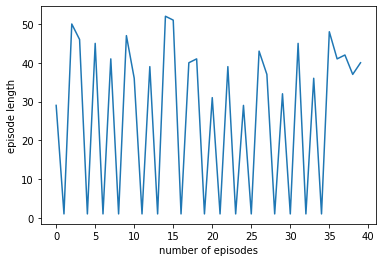

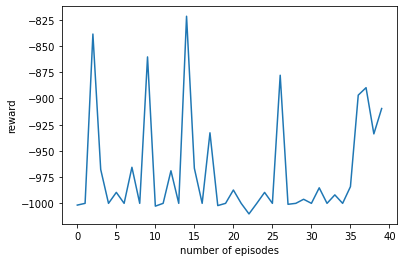

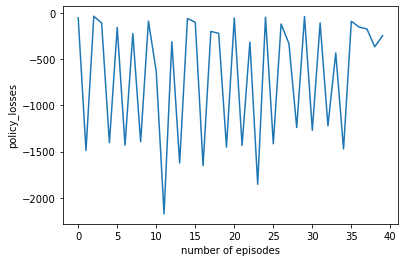

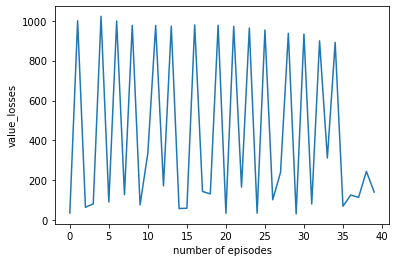

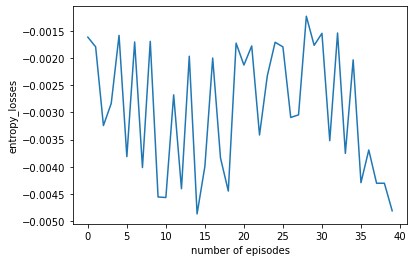

In [9]:
#torch.save(agent.net.state_dict(), 'dqn_model.pt') 
plt.plot(episode_len_list)
plt.xlabel('number of episodes')
plt.ylabel('episode length')
plt.show()
plt.plot(reward_list)
plt.xlabel('number of episodes')
plt.ylabel('reward')
plt.show()
plt.plot(policy_losses_list)
plt.xlabel('number of episodes')
plt.ylabel('policy_losses')
plt.show()
plt.plot(value_losses_list)
plt.xlabel('number of episodes')
plt.ylabel('value_losses')
plt.show()
plt.plot(entropy_losses_list)
plt.xlabel('number of episodes')
plt.ylabel('entropy_losses')
plt.show()

In [5]:
env.close()